🎯 Desafio dia 99 — Estudo e Desempenho Acadêmico

📂 Dataset: desafio_dia_99_estudo_desempenho.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Uma escola está investigando como diferentes hábitos dos alunos — como tempo de estudo, presença e uso de redes sociais — influenciam o desempenho final.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

    Preencha os valores ausentes em horas_estudo_semanais com a média geral da coluna.

    Crie uma nova coluna chamada comprometimento, definida como:

        comprometimento = horas_estudo_semanais * (presencas_percentual / 100)

📊 Análise geral

    Alunos com maior comprometimento tendem a tirar notas mais altas?
    → Calcule a correlação entre comprometimento e nota_final.

    Qual é o perfil médio dos alunos com nota maior que 8?
    → Média de horas de estudo, presença e redes sociais.

📈 Visualização de dados

    Crie um gráfico de dispersão entre comprometimento e nota_final, colorido por intensidade de uso_redes_sociais_horas_dia.

    Crie um histograma com a distribuição de nota_final.

🤖 Machine Learning — Regressão leve

    Modele a nota_final com base em:

        horas_estudo_semanais, presencas_percentual, uso_redes_sociais_horas_dia

    Utilize:

        LinearRegression, train_test_split, mean_squared_error

        Exiba o gráfico de valores reais vs. previstos (y_test vs y_pred)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_99_estudo_desempenho.csv")
df.head()

,id_aluno,horas_estudo_semanais,presencas_percentual,uso_redes_sociais_horas_dia,nota_final
0,3001,11.4,83.9,3.2,7.2
1,3002,20.2,93.8,4.7,6.8
2,3003,13.1,87.0,5.8,7.9
3,3004,17.3,78.9,1.2,6.6
4,3005,11.4,92.8,4.4,6.8


In [3]:
#Preencha os valores ausentes em horas_estudo_semanais com a média geral da coluna.
df["horas_estudo_semanais"] = df["horas_estudo_semanais"].fillna(df["horas_estudo_semanais"].mean())
df["horas_estudo_semanais"].isna().sum()

np.int64(0)

In [4]:
#Crie uma nova coluna chamada comprometimento, definida como:
    #comprometimento = horas_estudo_semanais * (presencas_percentual / 100)
    
df["comprometimento"] = df["horas_estudo_semanais"] * (df["presencas_percentual"] / 100)
df.head()

,id_aluno,horas_estudo_semanais,presencas_percentual,uso_redes_sociais_horas_dia,nota_final,comprometimento
0,3001,11.4,83.9,3.2,7.2,9.5646
1,3002,20.2,93.8,4.7,6.8,18.9476
2,3003,13.1,87.0,5.8,7.9,11.3970
3,3004,17.3,78.9,1.2,6.6,13.6497
4,3005,11.4,92.8,4.4,6.8,10.5792


In [5]:
#Alunos com maior comprometimento tendem a tirar notas mais altas?
    #→ Calcule a correlação entre comprometimento e nota_final.
corr_comprometimento_nota_final = df["comprometimento"].corr(df["nota_final"])
print(corr_comprometimento_nota_final)

-0.056534711442658356


In [10]:
#Qual é o perfil médio dos alunos com nota maior que 8?
    #→ Média de horas de estudo, presença e redes sociais.
nota_maior8 = df[df["nota_final"] >= 8]
media_all_nota8 = nota_maior8.groupby("nota_final")[["horas_estudo_semanais", "presencas_percentual", "uso_redes_sociais_horas_dia"]].mean()
print(media_all_nota8)

            horas_estudo_semanais  presencas_percentual  \
nota_final                                                
8.0                     12.292308             86.030769   
8.1                     12.933333             85.033333   
8.2                     13.530885             90.812500   
8.3                     12.036771             90.925000   
8.4                     10.350000             89.650000   
8.5                     10.650000             92.875000   
8.6                     11.636771             88.300000   
8.7                     10.875000             89.725000   
8.9                     11.800000             91.366667   
9.3                     10.500000             85.700000   
9.5                      5.000000             85.600000   
9.6                     10.300000             95.700000   
9.9                     15.000000             81.600000   
10.0                    14.225000             90.925000   

            uso_redes_sociais_horas_dia  
nota_final   

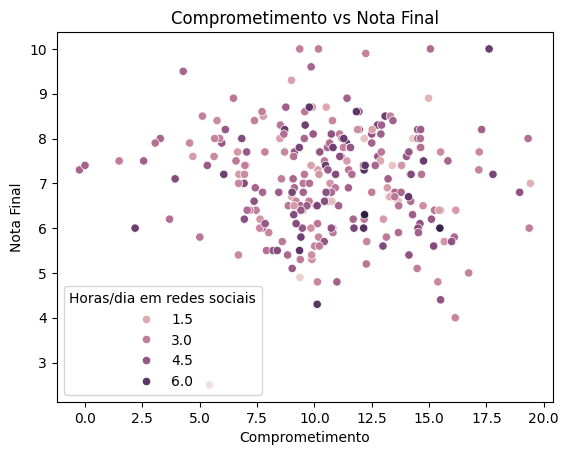

In [21]:
#Crie um gráfico de dispersão entre comprometimento e nota_final, colorido por intensidade de uso_redes_sociais_horas_dia.
sns.scatterplot(data=df, x="comprometimento", y="nota_final", hue="uso_redes_sociais_horas_dia")
plt.title("Comprometimento vs Nota Final")
plt.xlabel("Comprometimento")
plt.ylabel("Nota Final")
plt.legend(title="Horas/dia em redes sociais")
plt.show()

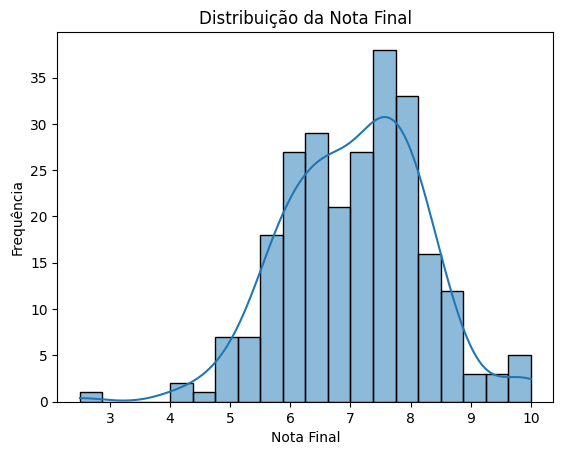

In [24]:
#Crie um histograma com a distribuição de nota_final.
sns.histplot(df["nota_final"], bins=20, kde=True)
plt.title("Distribuição da Nota Final")
plt.xlabel("Nota Final")
plt.ylabel("Frequência")
plt.show()

In [25]:
#Modele a nota_final com base em:
    #horas_estudo_semanais, presencas_percentual, uso_redes_sociais_horas_dia
    
X = df[["horas_estudo_semanais", "presencas_percentual", "uso_redes_sociais_horas_dia"]]
y = df["nota_final"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.0301860526931619


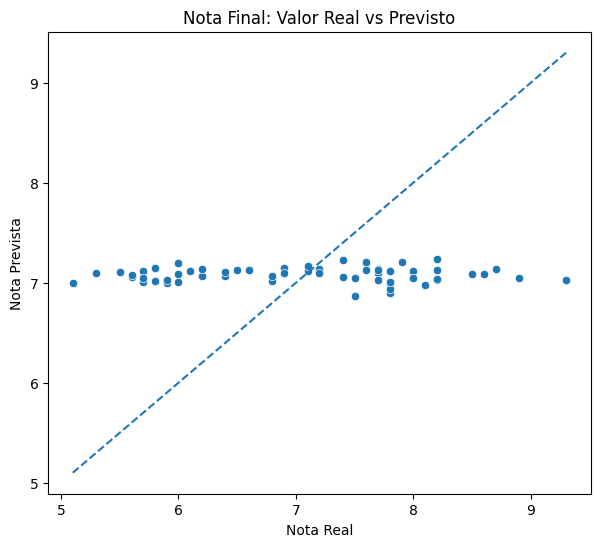

In [27]:
#Exiba o gráfico de valores reais vs. previstos (y_test vs y_pred)
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--')
plt.title("Nota Final: Valor Real vs Previsto")
plt.xlabel("Nota Real")
plt.ylabel("Nota Prevista")
plt.show()